# Week 8: Plotting Data

We will continue discussing pandas, but now we will be primarily focused on visualization. 

### Time data.

Dealing with time data is generally tricky. There are 
- timezones
- daylight savings
- bizarre formatting
- inconsistent numbers (months have 28, 29, 30, 31 days)

Moreover, time data is often not just a number (e.g. like an integer).

A common Python package for dealing with time data is `datetime`. 

`pandas` has tools to deal with time data.

Often one needs to give pandas a hint at how time data is formatted, and then pandas can reformat however is required. 

There are four basic styles:
1. Date times: A specific date and time with timezone support. Similar to `datetime.datetime` from the standard library.
2. Time deltas: An absolute time duration. Similar to `datetime.timedelta` from the standard library.
3. Time spans: A span of time defined by a point in time and its associated frequency.
4. Date offsets: A relative time duration that respects calendar arithmetic. Similar to `dateutil.relativedelta.relativedelta` from the `dateutil` package.

If you want to be overwhelmed by all that pandas can do with time data:

[check this out](https://pandas.pydata.org/docs/user_guide/timeseries.html).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

We will look at the publicly available [HPSC's Covid-19 county data](https://data.gov.ie/dataset/covid-19-hpsc-county-statistics-historic-data1).

In [ ]:
df = pd.read_csv("data/COVID-19_HPSC_County_Statistics_Historic_Data.csv", index_col='TimeStamp', parse_dates=True)
df.head()

Let's split off two counties.

[Recall that `query` defaults to making a copy while slicing defaults to a view.]

In [13]:
df_gal = df.query("CountyName == 'Galway'")
df_gal.head()

,OBJECTID,ORIGID,CountyName,PopulationCensus16,IGEasting,IGNorthing,Lat,Long,UGI,ConfirmedCovidCases,PopulationProportionCovidCases,ConfirmedCovidDeaths,ConfirmedCovidRecovered,SHAPE_Length,SHAPE_Area
TimeStamp,,,,,,,,,,,,,,,
2020-02-27 00:00:00+00:00,7,7,Galway,258058,151045,235818,53.3705,-8.7362,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,NaN,NaN,14.972448,0.822419
2020-03-01 00:00:00+00:00,33,7,Galway,258058,151045,235818,53.3705,-8.7362,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,NaN,NaN,14.972448,0.822419
2020-03-02 00:00:00+00:00,59,7,Galway,258058,151045,235818,53.3705,-8.7362,http://data.geohive.ie/resource/county/2ae1962...,0,0.0,NaN,NaN,14.972448,0.822419
2020-03-03 00:00:00+00:00,85,7,Galway,258058,151045,235818,53.3705,-8.7362,http://data.geohive.ie/resource/county/2ae1962...,0,0.0,NaN,NaN,14.972448,0.822419
2020-03-04 00:00:00+00:00,111,7,Galway,258058,151045,235818,53.3705,-8.7362,http://data.geohive.ie/resource/county/2ae1962...,0,0.0,NaN,NaN,14.972448,0.822419


In [14]:
df_gal["ConfirmedCovidCases"]

TimeStamp
2020-02-27 00:00:00+00:00        0
2020-03-01 00:00:00+00:00        0
2020-03-02 00:00:00+00:00        0
2020-03-03 00:00:00+00:00        0
2020-03-04 00:00:00+00:00        0
                             ...  
2023-11-09 00:00:00+00:00    93033
2023-11-10 00:00:00+00:00    93041
2023-11-11 00:00:00+00:00    93041
2023-11-12 00:00:00+00:00    93041
2023-11-13 00:00:00+00:00    93061
Name: ConfirmedCovidCases, Length: 1354, dtype: int64

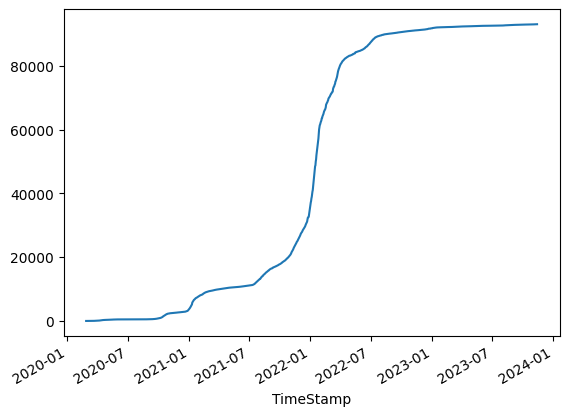

In [17]:
_ = df_gal["ConfirmedCovidCases"].plot()